# An analysis of crucial aspects of an electric car

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
#Importing the dataset

In [4]:
path = "C:\\Users\\r_ppe\\Desktop\\SDP\\electric cars.csv"

In [5]:
cars_dataset = pd.read_csv(path)

In [6]:
cars_dataset.head(10)

,CarName,BatterySize,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeedPerHour,Drive,NumberofSeats,PriceInEurope,ClaimedBatteryHealth
0,Lucid Air Dream Edition P,118 kWh useable battery,2.7 sec,270 km/h,645 km,183 Wh/km,82.0,All Wheel Drive,5,218000.0,B
1,Porsche Taycan Turbo S,83.7 kWh useable battery,2.8 sec,260 km/h,400 km,209 Wh/km,98.0,All Wheel Drive,4,189668.0,B
2,Audi e-tron GT RS,85 kWh useable battery,3.3 sec,250 km/h,405 km,210 Wh/km,100.0,All Wheel Drive,4,146050.0,E
3,Renault Zoe ZE50 R110,52 kWh useable battery,11.4 sec,135 km/h,315 km,165 Wh/km,23.0,Front Wheel Drive,5,36840.0,D
4,Audi Q4 e-tron 35,52 kWh useable battery,9.0 sec,160 km/h,285 km,182 Wh/km,36.0,Rear Wheel Drive,5,NaN,A
5,Tesla Model Y Performance,75 kWh useable battery,3.7 sec,250 km/h,415 km,181 Wh/km,64.0,All Wheel Drive,5,63667.0,A
6,Porsche Taycan 4 Cross Turismo,83.7 kWh useable battery,5.1 sec,220 km/h,425 km,197 Wh/km,105.0,All Wheel Drive,4,98514.0,B
7,Renault Zoe ZE50 R135,52 kWh useable battery,9.5 sec,140 km/h,310 km,168 Wh/km,23.0,Front Wheel Drive,5,37840.0,B
8,Porsche Taycan Turbo,83.7 kWh useable battery,3.2 sec,260 km/h,415 km,202 Wh/km,102.0,All Wheel Drive,4,156348.0,D
9,Smart EQ fortwo coupe,16.7 kWh useable battery,11.6 sec,130 km/h,100 km,167 Wh/km,NaN,Rear Wheel Drive,2,21940.0,E


In [7]:
#Eliminate the missing values with mean and median imputation
cars_dataset['FastChargeSpeedPerHour'].fillna(cars_dataset['FastChargeSpeedPerHour'].median(), inplace=True)
cars_dataset['PriceInEurope'].fillna(cars_dataset['PriceInEurope'].mean(), inplace=True)

C:\Users\r_ppe\AppData\Local\Temp\ipykernel_6324\1814556511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_dataset['FastChargeSpeedPerHour'].fillna(cars_dataset['FastChargeSpeedPerHour'].median(), inplace=True)
C:\Users\r_ppe\AppData\Local\Temp\ipykernel_6324\1814556511.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [8]:
cars_dataset.head(20)

,CarName,BatterySize,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeedPerHour,Drive,NumberofSeats,PriceInEurope,ClaimedBatteryHealth
0,Lucid Air Dream Edition P,118 kWh useable battery,2.7 sec,270 km/h,645 km,183 Wh/km,82.0,All Wheel Drive,5,218000.000000,B
1,Porsche Taycan Turbo S,83.7 kWh useable battery,2.8 sec,260 km/h,400 km,209 Wh/km,98.0,All Wheel Drive,4,189668.000000,B
2,Audi e-tron GT RS,85 kWh useable battery,3.3 sec,250 km/h,405 km,210 Wh/km,100.0,All Wheel Drive,4,146050.000000,E
3,Renault Zoe ZE50 R110,52 kWh useable battery,11.4 sec,135 km/h,315 km,165 Wh/km,23.0,Front Wheel Drive,5,36840.000000,D
4,Audi Q4 e-tron 35,52 kWh useable battery,9.0 sec,160 km/h,285 km,182 Wh/km,36.0,Rear Wheel Drive,5,71039.826241,A
5,Tesla Model Y Performance,75 kWh useable battery,3.7 sec,250 km/h,415 km,181 Wh/km,64.0,All Wheel Drive,5,63667.000000,A
6,Porsche Taycan 4 Cross Turismo,83.7 kWh useable battery,5.1 sec,220 km/h,425 km,197 Wh/km,105.0,All Wheel Drive,4,98514.000000,B
7,Renault Zoe ZE50 R135,52 kWh useable battery,9.5 sec,140 km/h,310 km,168 Wh/km,23.0,Front Wheel Drive,5,37840.000000,B
8,Porsche Taycan Turbo,83.7 kWh useable battery,3.2 sec,260 km/h,415 km,202 Wh/km,102.0,All Wheel Drive,4,156348.000000,D
9,Smart EQ fortwo coupe,16.7 kWh useable battery,11.6 sec,130 km/h,100 km,167 Wh/km,50.0,Rear Wheel Drive,2,21940.000000,E


## Data Visualization

### In order to see how relevant the gathered data is, it's recommended to visualize it first. Based on charts it can be sometimes easily seen if the selected data is important and correct for tha analysis or not.

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\r_ppe\AppData\Local\Temp\ipykernel_6324\255092095.py:3: SyntaxWarning: invalid escape sequence '\d'
  cars_dataset['NumericBattery'] = cars_dataset['BatterySize'].str.extract('(\d+)', expand=False).astype(float)


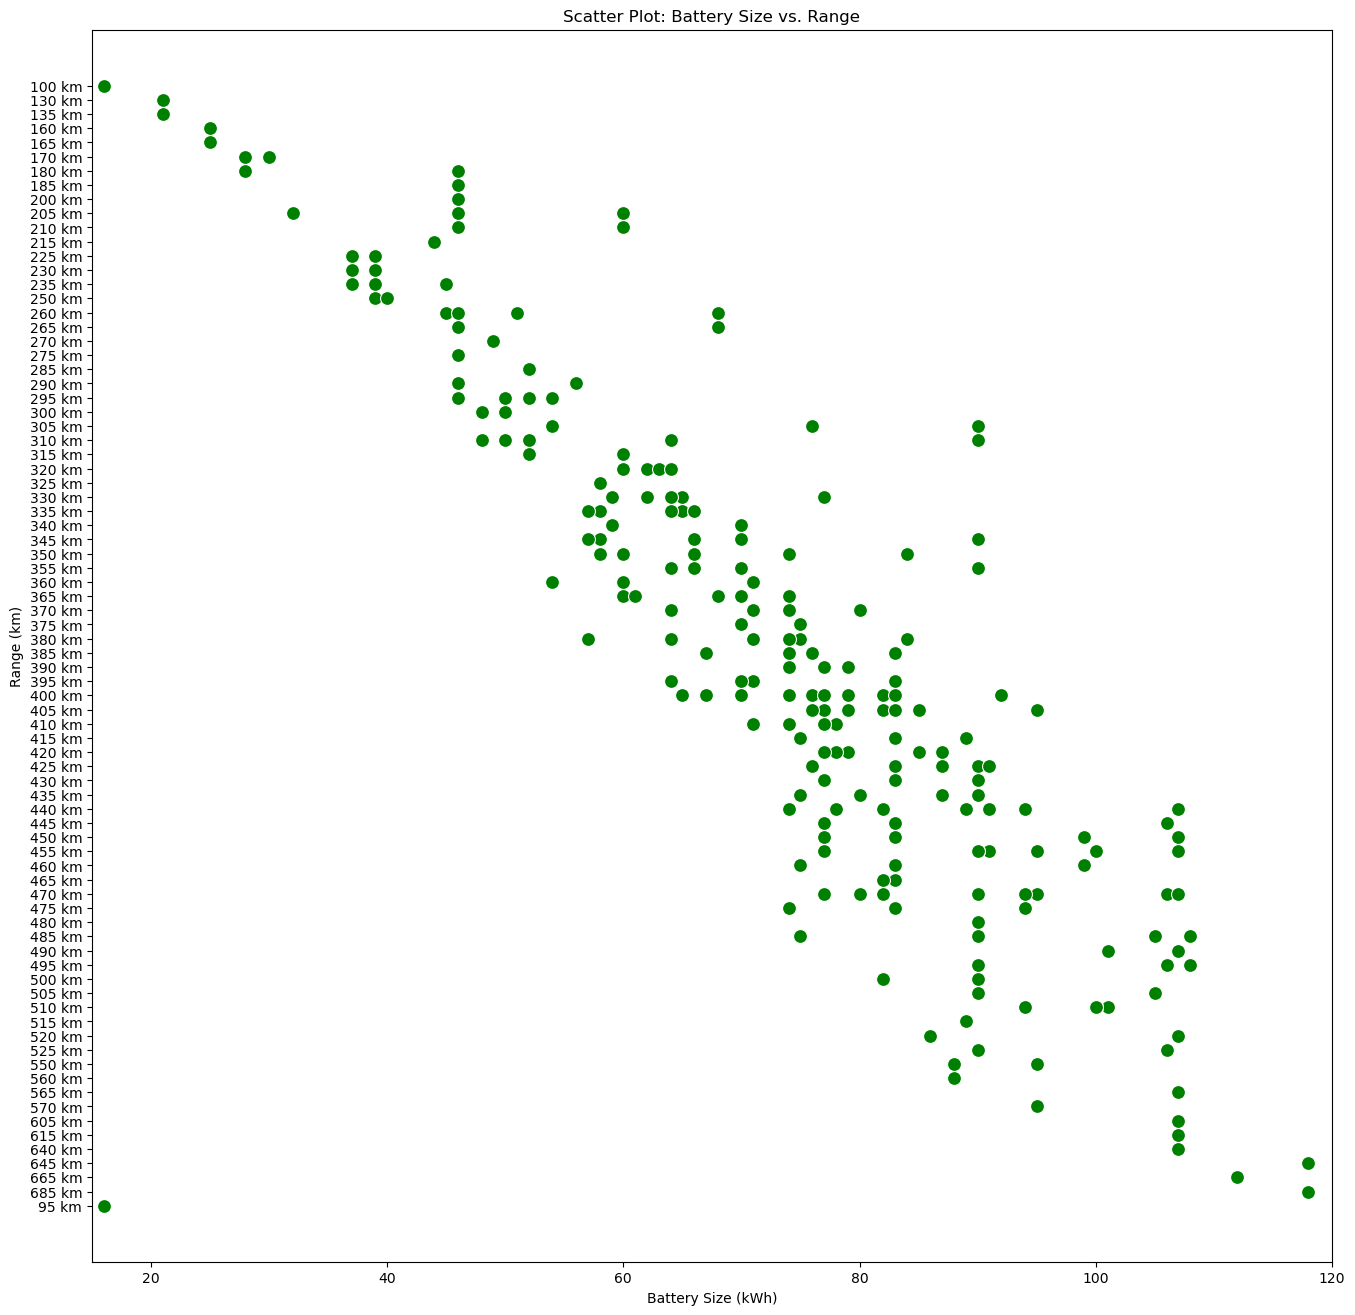

In [12]:
#Check if there is a correlation between the battery size and the range of a car
cars_dataset = cars_dataset.sort_values(by='Range', ascending=True)
cars_dataset['NumericBattery'] = cars_dataset['BatterySize'].str.extract('(\d+)', expand=False).astype(float)
plt.figure(figsize=(16,16))
sns.scatterplot(data=cars_dataset, x='NumericBattery', y='Range', marker='o', color='green', s=100)
plt.xlim(15, 120)
plt.title('Scatter Plot: Battery Size vs. Range')
plt.xlabel('Battery Size (kWh)')
plt.ylabel('Range (km)')
plt.show()

### Based on the information given on this graph which compares the battery size and the range of an car, it can be clearly seen, that small batteries will offer a lower range for an electric car, but a larger batatery size does not automatically mean that the range will be great. While cars with larger batteries will generally perform better, there are more factors that come into play when it comes to the efficiency and maximum potential of an vehicle.

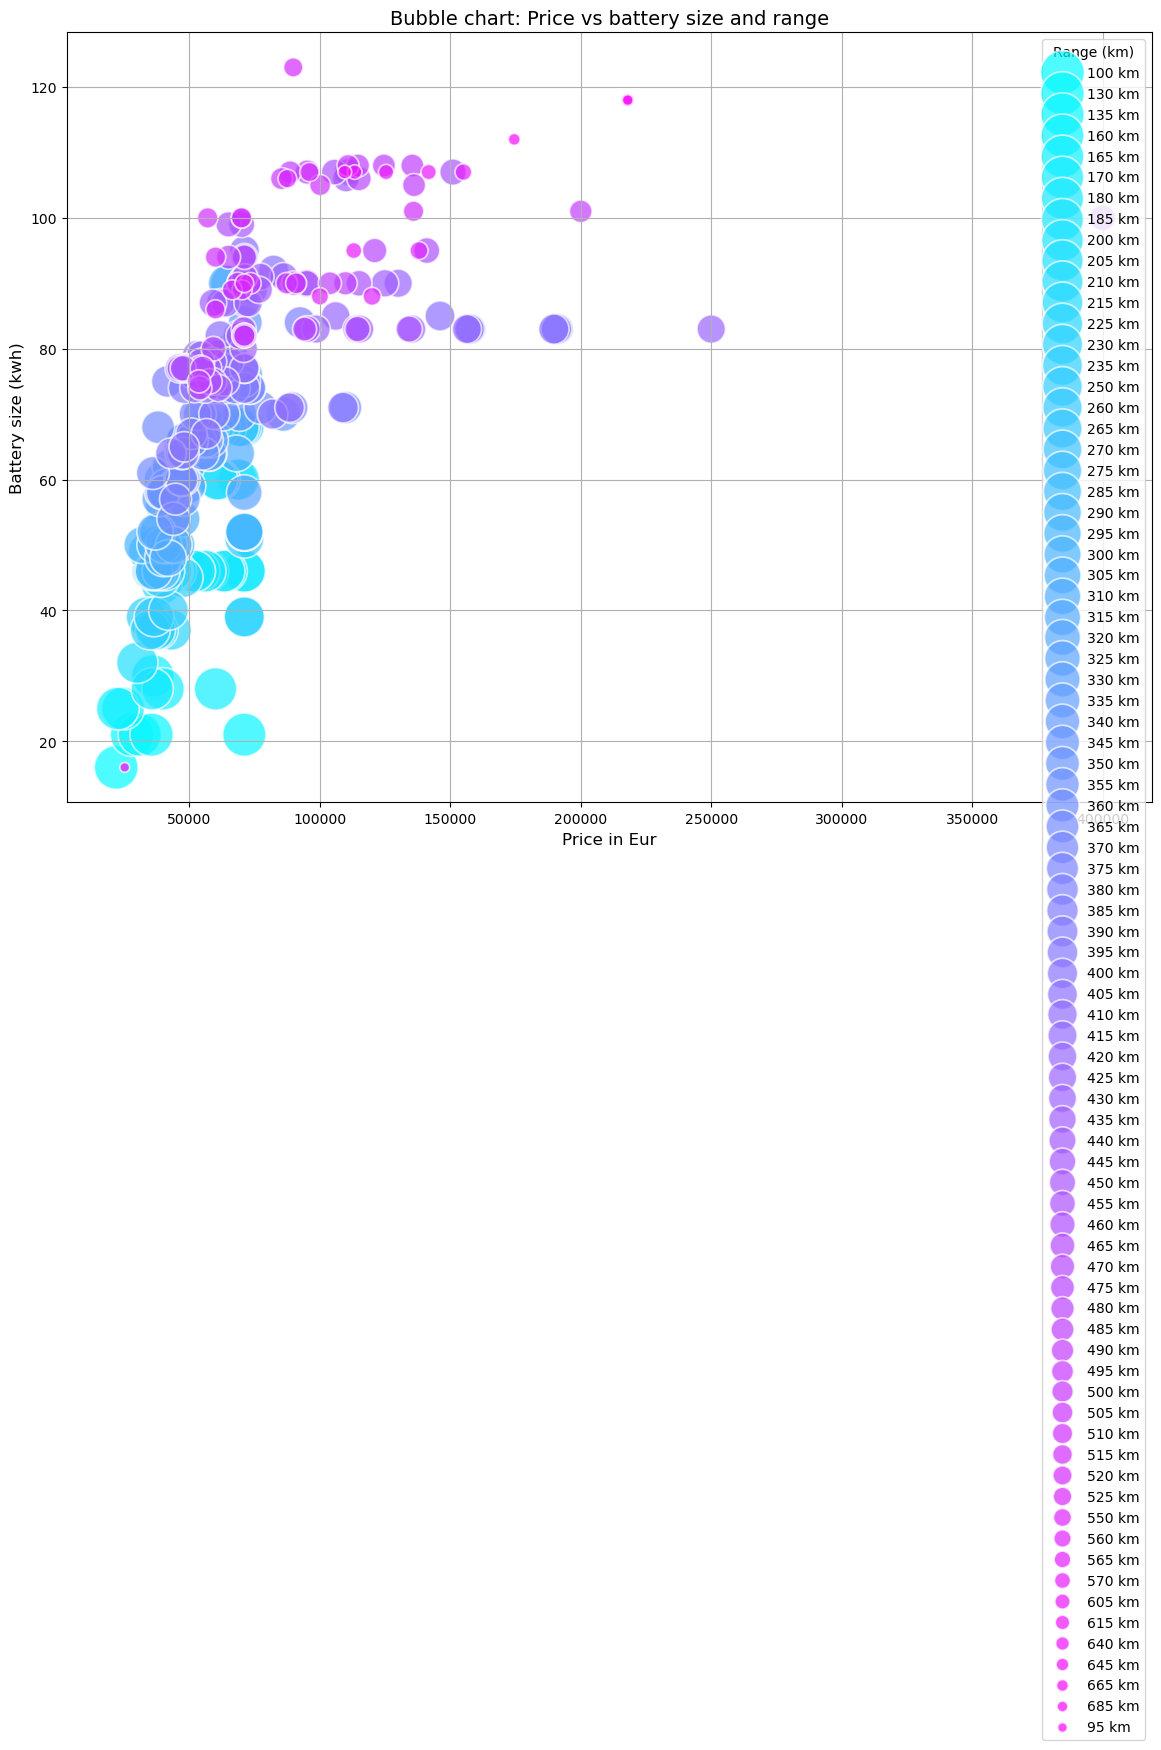

In [15]:
#Bubble chart to show if more expensive vehicles are going to have a better range than cheaper ones.
plt.figure(figsize=(14,10))
bubble_chart = sns.scatterplot( data=cars_dataset, x='PriceInEurope', y='NumericBattery', size='Range', sizes=(50,1000),
                               alpha=0.7, hue='Range', palette='cool')
plt.title('Bubble chart: Price vs battery size and range', fontsize=14)
plt.xlabel('Price in Eur', fontsize=12)
plt.ylabel('Battery size (kwh)', fontsize=12)
plt.legend(title='Range (km)', loc='upper right')
plt.grid(True)
plt.show()

### It was seen from the previous chart that while there is a correlation between the size of a battery and the cars range, there were more components that must be taken into consideration. This graph right here proves this too. Usually a higher price will mean that the battery will be larger and the range higher, but there are some cars below 100000 Euros that have a very large range. It shows that the quality of the battery and a lower consumption rate will also play a key role in determining the range of a car. While more expensive cars will probably offer better results, if a car is well-thought from the start, it can also be cheaper and still be great.

C:\Users\r_ppe\AppData\Local\Temp\ipykernel_6324\1133954227.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = cars_dataset.pivot_table(


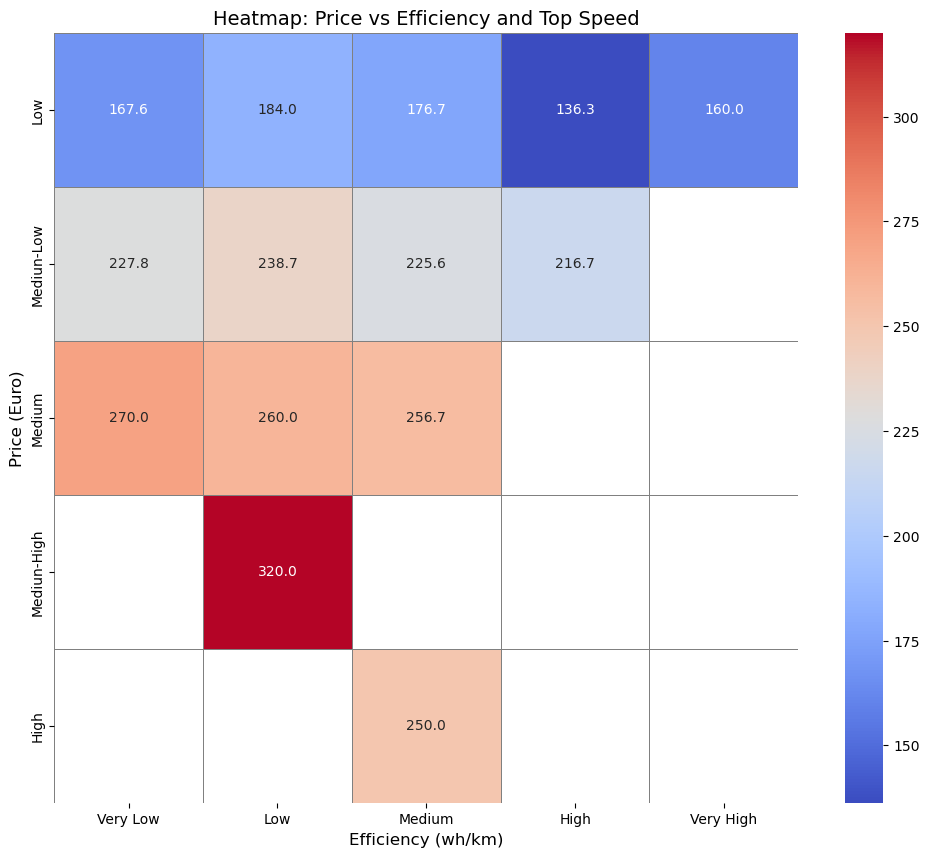

In [17]:
#Heatmap to see if more expensive cars will have better efficiency and top speed.
cars_dataset['PriceBins']=pd.cut(cars_dataset['PriceInEurope'], bins=5, labels=['Low', 'Mediun-Low', 'Medium', 'Mediun-High', 'High'])
cars_dataset['EfficiencyNumbers'] = cars_dataset['Efficiency'].str.extract(r'(\d+)', expand=False).astype(float)
cars_dataset['EfficiencyNumbers'] = cars_dataset['EfficiencyNumbers'].fillna(0)
cars_dataset['EfficiencyBins'] = pd.cut(cars_dataset['EfficiencyNumbers'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
cars_dataset['TopSpeedNumeric'] = cars_dataset['TopSpeed'].str.extract(r'(\d+)', expand=False).astype(float)

heatmap_data = cars_dataset.pivot_table( 
    values='TopSpeedNumeric',
    index='PriceBins',
    columns='EfficiencyBins',
    aggfunc='mean'
)

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.6, linecolor='gray') 
plt.title("Heatmap: Price vs Efficiency and Top Speed", fontsize=14)
plt.xlabel("Efficiency (wh/km)", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)

plt.show()

### From this chart it can be seen, that most of fast cars are not really very efficient. There seems to be a negative correlation between efficiency and top speed, meaning that the slower cars will have higher efficiency and lower consumption compared to the fast ones. At the same time, there is a positive correlation between the price of a car and the top speed. Cheaper cars are also slower, while more expensive vehicles can reach higher speeds.

C:\Users\r_ppe\AppData\Local\Temp\ipykernel_6324\4128536868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


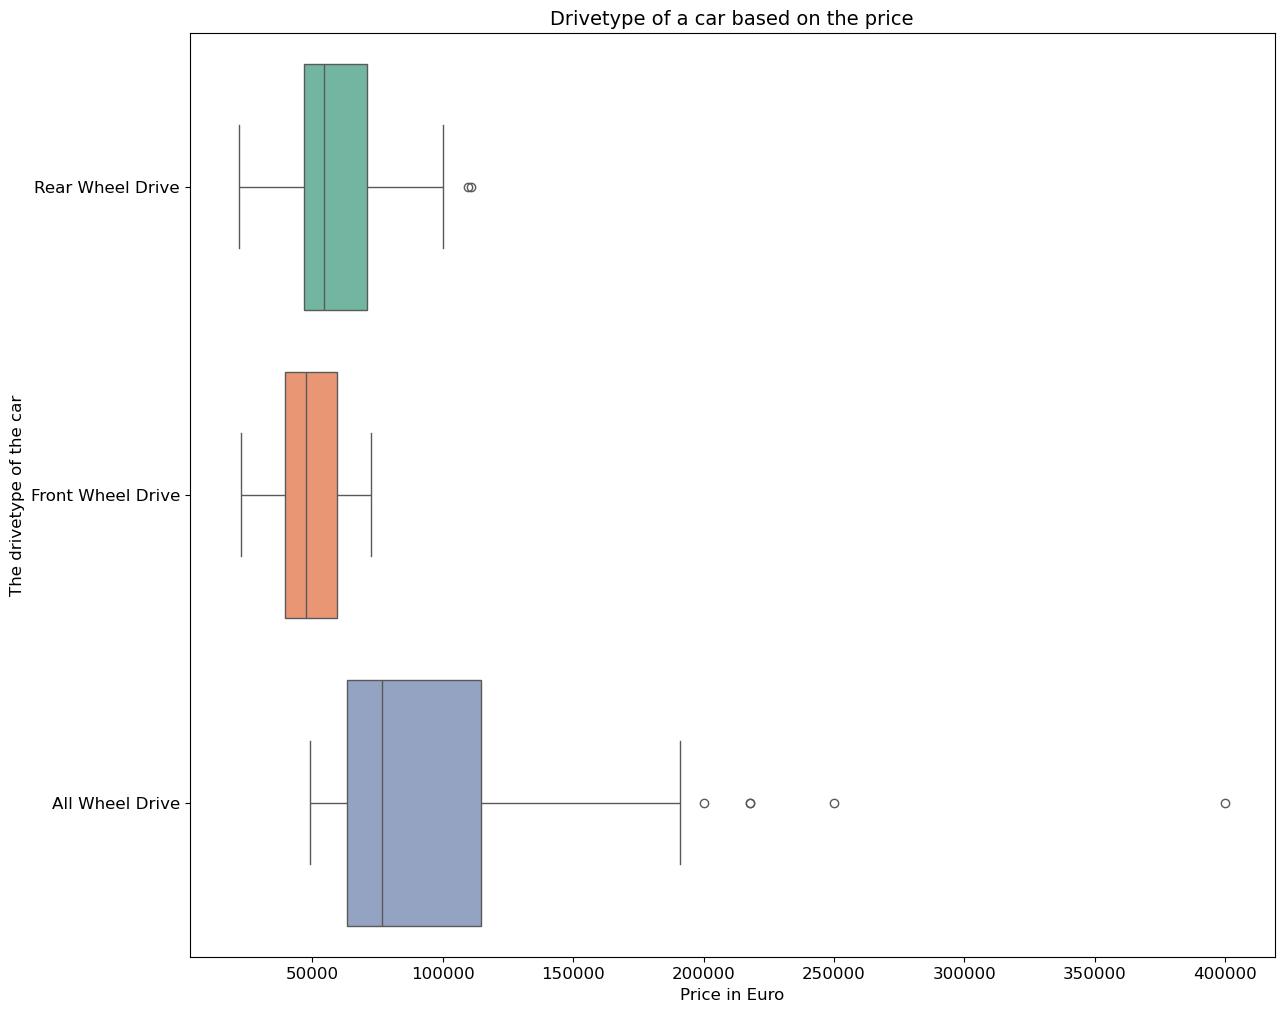

In [19]:
#A boxplot comparing price and DriveType (all wheel drive is the safest and the best)
plt.figure(figsize=(14,12))
sns.boxplot(
    data=cars_dataset,
    x='PriceInEurope',
    y='Drive',
    palette='Set2'
)
plt.title("Drivetype of a car based on the price", fontsize=14)
plt.xlabel("Price in Euro", fontsize=12)
plt.ylabel("The drivetype of the car", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Based on the output of the boxplot, it confirms the fact that more expensive cars have an all wheel drive which is safer, more efficient and better overall for the driver and the car. The cheapest cars have a front wheel drive, the cheapest and easiest to implement. Rear wheel drive vehicles are more expensive on average than from wheel drive cars, but they are behind all wheel drive. So, it can be said that there is a strong correlation between the price of a car and the drive mechanism inside of the car. The cheapest cars are using the cheapest drivetype and the most expensive vehicles are having an all wheel drive, which is the best.

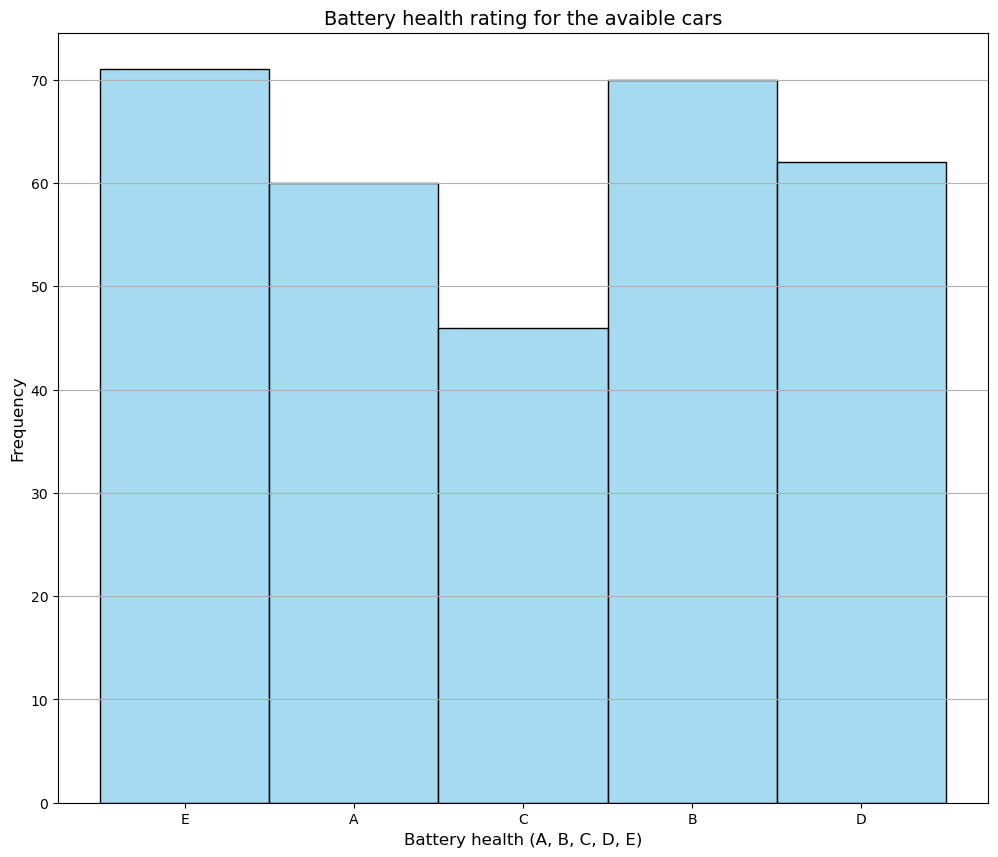

In [21]:
#Histogram for the distribution of the battery health of the cars (A is the best and E is the worst).
plt.figure(figsize=(12,10))
sns.histplot(data=cars_dataset, x='ClaimedBatteryHealth', stat='count', discrete=True, color='skyblue')
plt.title("Battery health rating for the avaible cars", fontsize=14)
plt.xlabel("Battery health (A, B, C, D, E)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y')
plt.show()

### Based on the results, there are 71 cars with the E rating, 62 with the rating D, 46 with the rating C, 70 with the rating B and 60 with the rating A. There are 133 cars (E+D) whose batteries will likely degrade pretty fast after the first year, while 130 (A+B) cars will keep their capacity for longer. The rest of the 46 cars are neither grat, nor bad.

C:\Users\r_ppe\AppData\Local\Temp\ipykernel_6324\3784036187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


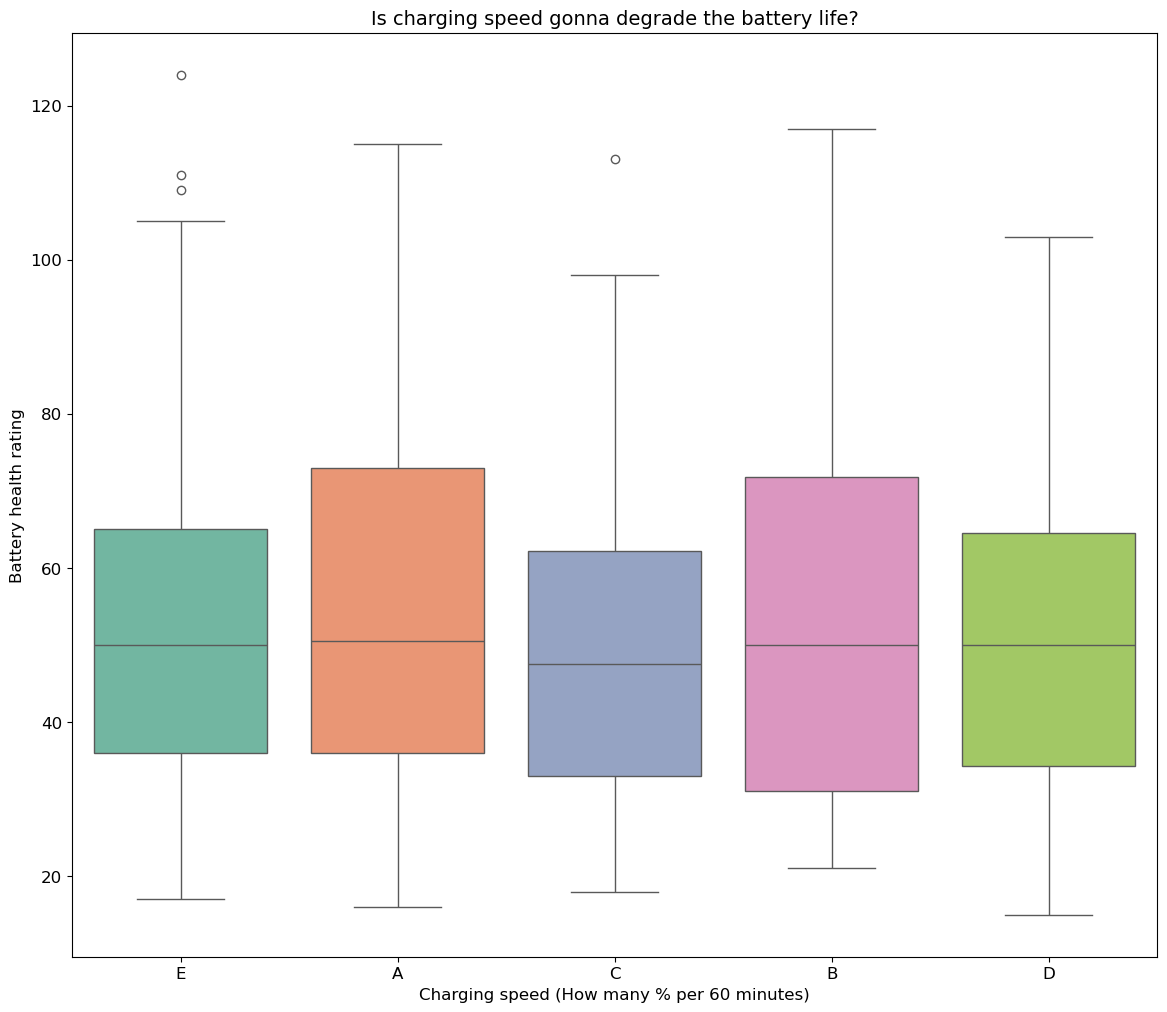

In [23]:
#Boxplot to see if very fast charging can link to a worse battery health or not.
plt.figure(figsize=(14,12))
sns.boxplot(
    data=cars_dataset,
    x='ClaimedBatteryHealth',
    y='FastChargeSpeedPerHour',
    palette='Set2'
)
plt.title("Is charging speed gonna degrade the battery life?", fontsize=14)
plt.xlabel("Charging speed (How many % per 60 minutes)", fontsize=12)
plt.ylabel("Battery health rating", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Looking at the graph right here, it cannot be said that faster charging cars will automatically have a worse battery health. The highest median value can be seen for the category A, which shhould have the best battery technology and slowest degradation. Also, the values that are between the first and third quartile are also the highest in the box from A and the lowest in the box from C. The results from D and E are in the middle of the pack, showing that the worst batteries don't have the fasteset charging speeds. But this graph alone is not completley conclusive. There must be further tests done and the outliers in E and C have to be analyzed.

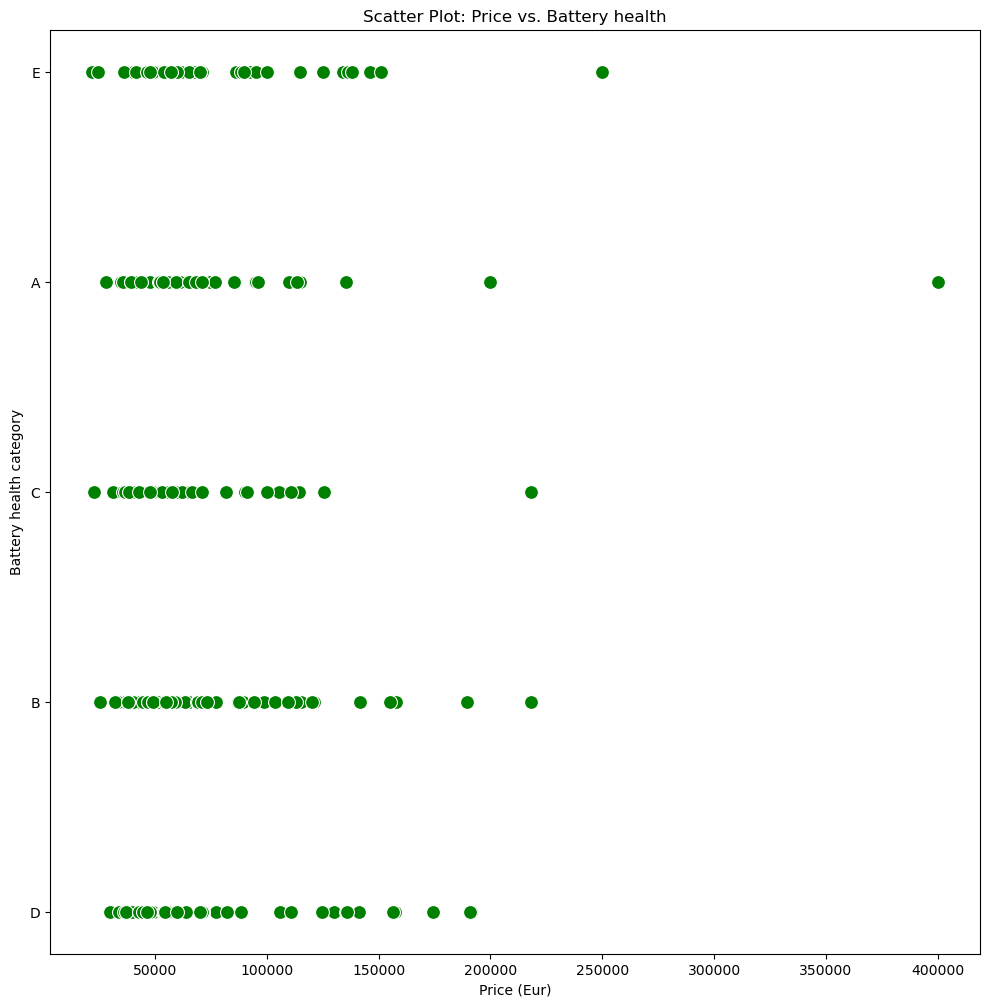

In [25]:
#Scatterplot to see if price and battery health are correlated.
plt.figure(figsize=(12,12))
sns.scatterplot(data=cars_dataset, x='PriceInEurope', y='ClaimedBatteryHealth', marker='o', color='green', s=100)
plt.title('Scatter Plot: Price vs. Battery health')
plt.xlabel('Price (Eur)')
plt.ylabel('Battery health category')
plt.show()

### Based on the results shown in the chart, there is no significant correlation between the price of a car and the battery health. It's just about how much money did the manufacturer invest in the battery and consumption system itself. Further analysis must be provided in order to check this as a visual result can not show the whole situaion with 100% accuracy.

### So far, it can be said that generally a more expensive vehicle will be more capable and more reliable, but with some research, a customer can get a very good electric car at an lower price. He does not have to spend extra just to get a properly functioning car.

# Machine Learning Frameworks

## Linear regression

### The regression will be done in order to see if the price of a car influences the components that have been used to build it.

In [32]:
#Linear regression
cars_dataset['RangeNumbers'] = cars_dataset['Range'].str.extract(r'(\d+)', expand=False).astype(float)
cars_dataset['AccelerationNumbers'] = cars_dataset['Acceleration'].str.extract(r'(\d+)', expand=False).astype(float)
X=cars_dataset[['NumericBattery', 'AccelerationNumbers', 'RangeNumbers', 'EfficiencyNumbers', 'TopSpeedNumeric']]
y=cars_dataset['PriceInEurope']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

print("Linear regression results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2_score: {r2_score(y_test, y_pred):.2f}")

Linear regression results:
Mean squared error: 565185936.26
R2_score: 0.69


### The R2_score equal to 0.69 means that 69% of the variance in car pricing can be explained by this model which contains the numeric values for acceleration, battery capacity, range, efficiency and top speed. The result suggests that the model is good and the variables catch most of the variability of the price. The MSE of 565185936.26 is extremly high, but that is caused by the big fluctuations in the pricing of the cars. Due to being impacted so much by range of the pricing, we have to look at RMSE for a better interpretation. Also, it would be recommended to check how significant is every cindipendent variable too.

In [34]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

RMSE:  23773.639524957045


In [35]:
print("Mean price:", cars_dataset['PriceInEurope'].mean())
print("Minimum price:", cars_dataset['PriceInEurope'].min())
print("Maximum price:", cars_dataset['PriceInEurope'].max())

Mean price: 71039.82624113475
Minimum price: 21940.0
Maximum price: 400000.0


### Based on the results of the RMSE, the mean price and the price range of the cars, the following can be said:
### -The RMSE value of 23773,6395 is close to the minimum price of 21940 and much lower than the mean price of 71039.82 and the maximum price of 4000000.
### This suggests that overall the model performs well and there are not possible problems of overfitting or underfitting.

In [37]:
#Seeing how relevant each individual variable is

features = ['NumericBattery', 'AccelerationNumbers', 'RangeNumbers', 'EfficiencyNumbers', 'TopSpeedNumeric']
results = []
for feature in features:
    X = cars_dataset[[feature]]
    z=cars_dataset['PriceInEurope']
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    linear_regression = LinearRegression()
    linear_regression.fit(X_train, z_train)
    z_pred = linear_regression.predict(X_test)

    mse = mean_squared_error(z_test, z_pred)
    r2= r2_score(z_test, z_pred)
    rmse = np.sqrt(mean_squared_error(z_test, z_pred))

    results.append({
        'Feature' : feature,
        'Mean sqared error': mse,
        'Root mean squared error' : rmse,
        'R2_square' : r2
    })
    
results_df = pd.DataFrame(results)
print(results_df)
      

               Feature  Mean sqared error  Root mean squared error  R2_square
0       NumericBattery       1.114225e+09             33380.009180   0.386449
1  AccelerationNumbers       1.180979e+09             34365.374535   0.349690
2         RangeNumbers       1.283536e+09             35826.463819   0.293217
3    EfficiencyNumbers       1.754426e+09             41885.872465   0.033920
4      TopSpeedNumeric       6.264846e+08             25029.675005   0.655024


### Judging by the results, it can be said that the most relevant variable in this multiple regression is the top speed with the highest R sqare of 0.655 and the smallest MSE. The value of 25029.675 that the top speed RMSE has is also the lowest and closest to the minimum pricing of the electric cars. So, the variable TopSpeed is by far the most significant out of the 5. The other variables are not irrelevant, but there is a weaker direct correlation between them and the price of the car compared to the correlation between top speed and price, making them less influential in the determination of the price.

### Checking the residuals

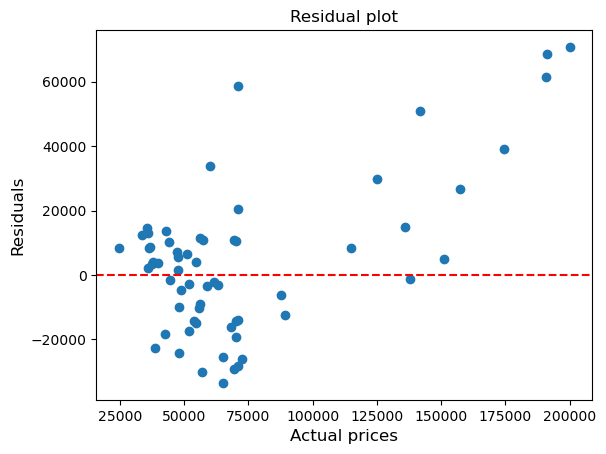

In [46]:
resid = y_test - y_pred
plt.scatter(y_test, resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual prices", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual plot")
plt.show()

### The plot shows that the residuals are distributed in a funnel type of shape, which usually means that there is heteroskedasticity. For the moderate priced cars the residuals hover around 0, which means that the model is quite accurate for the middle-priceed cars. The low-priced and high-priced cars on the other hand are not entierly accurately represented by this model. This means that there might be some other caomponents that should have been taken into consideration. Also, there is no clear linear or non-linear pattern as of now, because the residuals have a high variety for low and high price values, while for the middle prices there is a linear pattern.

### In order to gain more important information about our data, some non-linear regression models will be used.

## Random Forest 

### This algorithm uses a method that combines multiple decision trees in order to improve a prediciton

In [52]:
X=cars_dataset[['NumericBattery', 'AccelerationNumbers', 'RangeNumbers', 'EfficiencyNumbers', 'TopSpeedNumeric']]
y=cars_dataset['PriceInEurope']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Random Forest Regressor Results:
Mean Squared Error: 608755170.8459953
R^2 Score: 0.6647871871077625


# Gradient Boosting

## This algorithm builds models sequentially and optimizes predictions by minimizing errors

In [55]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Results:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R^2 Score: {gb_r2}")


Gradient Boosting Regressor Results:
Mean Squared Error: 1037575124.0226334
R^2 Score: 0.42865622738401543


### After comparing the results of both algorithms, it can be said that the random forest regression is the better performing one, because it has a much lower mean squared error and a higher r square score of 0.6647 in contrast to the gradient boosting score of 0.4285. By using the random forest algorithm, the independent variables explain around 66,48% of the variance of the pricing variable. The same variables explain just 42,87% of the variance of the dependent variable. The gradient boosting regression underperforms and it is necessary to see which features are the most important and how the parameters can be better tuned to improve the model. This process will also be done for the random forest regression with the aim to see if it can be improved upon.

## Feature importance and tuning of the hyperparameteres in gradient boosting

In [60]:
print("Gradient Boosting Regressor\n")
gb = GradientBoostingRegressor(random_state=42)
gb_parameters = {
    'n_estimators': [100,200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(estimator=gb, param_grid=gb_parameters, scoring='r2', cv=3, verbose=1, n_jobs=-1)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)

Gradient Boosting Regressor

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### The best gradient boosting model will have a learning_rate of 0,1, a depth of 3 and 100 estimators. It means that the model with the R^2 score of 0.42865 is the best one when speaking about gradient boosting regressions.

In [62]:
#Prediction and evaluation
gb_predictions = gb_best.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Mean Squared Error: {gb_mse}")
print(f"R^2 Score: {gb_r2}")

Mean Squared Error: 1037575124.0226334
R^2 Score: 0.42865622738401543


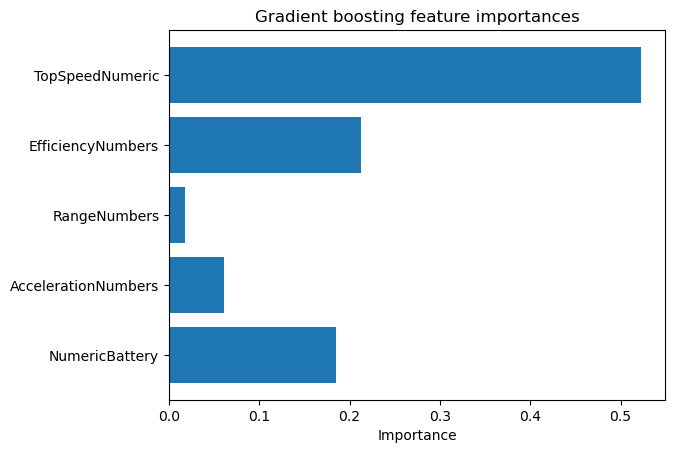

In [63]:
#Seeing how important each feature is
gb_importances = gb_best.feature_importances_
plt.barh(X.columns, gb_importances)
plt.title("Gradient boosting feature importances")
plt.xlabel("Importance")
plt.show()

### From the five variables used, the top speed has the most impact in this model and it suggests that the top speed of the car has the highest positive correlation with the price of the car. The efficiency of the car is also important, but has not an impact as strong in the regression and the pricing of a vehicle as the top speed. The same can be said by the battery size. They influence the price of an car, but not as strongly as the top speed. The range of a vehicle and it's acceleration are not really that important in this regression.

## Feature importance and tuning of the hyperparameteres in random forest

In [68]:
print("\n Random Forest Regressor\n")
rf = RandomForestRegressor(random_state=42)
rf_parameters = {
    'n_estimators': [100,200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_parameters, scoring='r2', cv=3, verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)


 Random Forest Regressor

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### From what it can be seen, the best random forest model, should have 200 estimators, no depth and 2 splitted samples. Right now, we will create that model to see if there is a significant improvement compared to the original one.

In [71]:
rf_predictions = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Mean Squared Error: 612940180.1499125
R^2 Score: 0.6624826995108906


### Compared to the initial model, we see some changes. The mean squared error has increased from 608755170.84 to 612940180.15 and the R^2 score has slighlty decreased by 0,24% from 66,48% to 66,24%. This means, that the selected variables explain slitghly less the variance of the dependent variable than initially tought. 

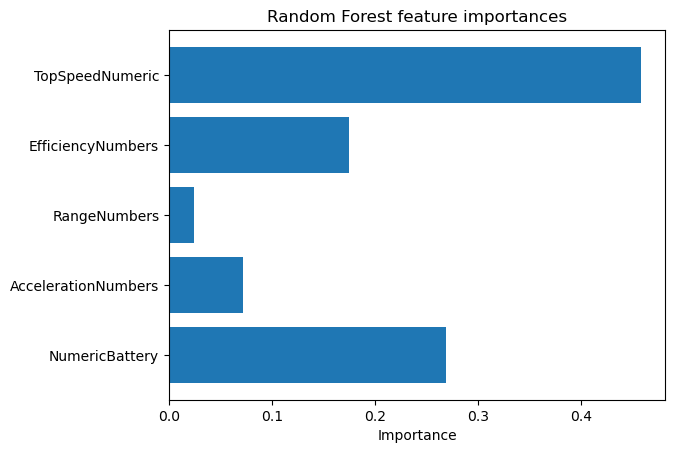

In [74]:
#Feature importance in Random Forest regression
rf_importances = rf_best.feature_importances_
plt.barh(X.columns, rf_importances)
plt.title("Random Forest feature importances")
plt.xlabel("Importance")
plt.show()

### Compared to the gradient boosting regression, we see some important differences. At first, the top speed is still the most important factor and it has the strongest influence on the pricing of a vehicle. On the second place, the battery size palys a biigger role than in the gradient boosting model. A larger battery will usually indicate that a car is more expensive. The efficiency of consumption still is relevant, but not as important as in the other model and contributes to the variance of the pricing less compared to the battery size and top speed. The acceleration is slightly more important, but not by much compared to the gradient boosting regression and the range has a similar significance. Overall, in this model, the indipendent variables are more relevant.

In [77]:
# More detailed optimization of the random forest regression
rf = RandomForestRegressor(random_state=42)
rf_parameters = {
    'n_estimators': [100,200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_parameters, scoring='r2', cv=5, verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [79]:
rf_predictions = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Mean Squared Error: 628194192.1532797
R^2 Score: 0.6540830332469727


### It looks like the R^2 score has decrease again to 65,4%, but the MSE has increased significantly to 628194192.15. If that did not happen, then the previous results would have been used to check the residuals. The higher value of the MSE compensates for the R^2 score, which is lower by 1% compared to the initial random forest regression.

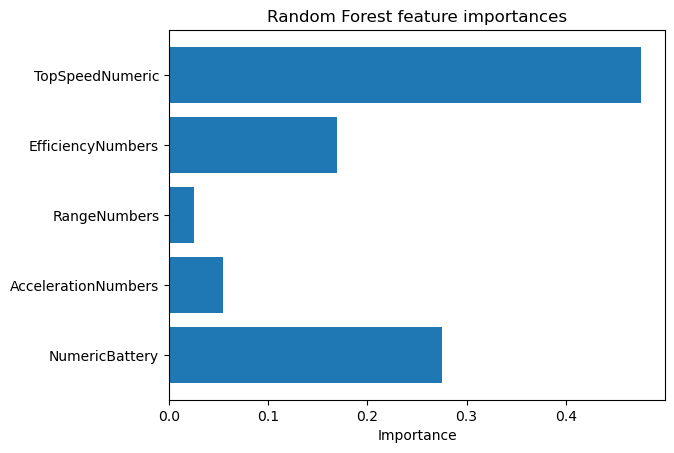

In [86]:
#Feature importance in Random Forest regression
rf_importances = rf_best.feature_importances_
plt.barh(X.columns, rf_importances)
plt.title("Random Forest feature importances")
plt.xlabel("Importance")
plt.show()

### There importance of the features has not changed significantly, which means the latest model will be used to see the residuals.

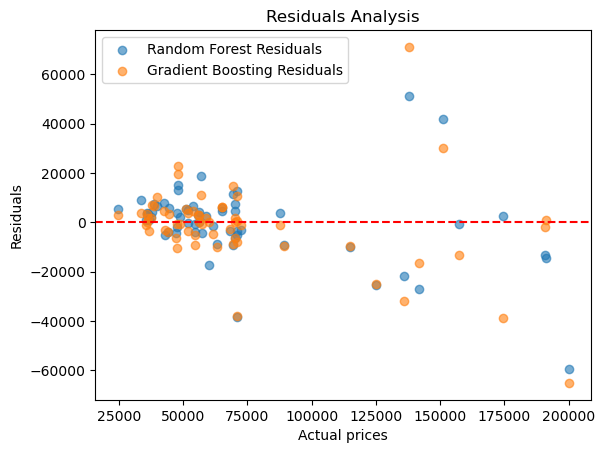

In [111]:
# Residual plot
plt.scatter(y_test, rf_predictions - y_test, label="Random Forest Residuals", alpha=0.6)
plt.scatter(y_test, gb_predictions - y_test, label="Gradient Boosting Residuals", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Analysis")
plt.xlabel("Actual prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### Most of the residuals in both cases hover around the value of 0, which means that there is no systematic bias, but fot the higher prices, it can be seen that the residual values are high. This means that the models struggle to predict accurately for higher prices. At the same time, there is no visible ctrend for the residuals, which means that the regression models work as expected. A check for outlier values and adressing them should be enough to improve the results.

In [93]:
residuals_gb =  gb_predictions - y_test
residuals_rf = rf_predictions - y_test


q1_gb = np.percentile(residuals_gb, 25)
q3_gb = np.percentile(residuals_gb, 75)
iqr_gb = q3_gb - q1_gb

q1_rf = np.percentile(residuals_rf, 25)
q3_rf = np.percentile(residuals_rf, 75)
iqr_rf = q3_rf - q1_rf

lower_bound_gb = q1_gb - 1.5 * iqr_gb
upper_bound_gb = q3_gb + 1.5 * iqr_gb

lower_bound_rf = q1_rf - 1.5 * iqr_rf
upper_bound_rf = q3_rf + 1.5 * iqr_rf

In [95]:
outliers_gb = residuals_gb[(residuals_gb<lower_bound_gb) | (residuals_gb>upper_bound_gb)]
print(f"Number of outliers: {len(outliers_gb)}")

Number of outliers: 6


In [97]:
outliers_rf = residuals_rf[(residuals_rf<lower_bound_rf) | (residuals_rf>upper_bound_rf)]
print(f"Number of outliers: {len(outliers_rf)}")

Number of outliers: 7


In [99]:
outlier_gb_indices = outliers_gb.index
outlier_gb_data = X_test.loc[outlier_gb_indices]
print("Outlier data:")
print(outlier_gb_data)

Outlier data:
     NumericBattery  AccelerationNumbers  RangeNumbers  EfficiencyNumbers  \
176           101.0                  4.0         510.0              199.0   
303           101.0                  3.0         490.0              208.0   
209            21.0                  9.0         135.0              158.0   
236           107.0                  2.0         450.0              238.0   
52             95.0                  2.0         550.0              173.0   
231            90.0                  4.0         435.0              208.0   

     TopSpeedNumeric  
176            240.0  
303            250.0  
209            135.0  
236            260.0  
52             282.0  
231            210.0  


In [101]:
outlier_rf_indices = outliers_rf.index
outlier_rf_data = X_test.loc[outlier_rf_indices]
print("Outlier data:")
print(outlier_rf_data)

Outlier data:
     NumericBattery  AccelerationNumbers  RangeNumbers  EfficiencyNumbers  \
176           101.0                  4.0         510.0              199.0   
303           101.0                  3.0         490.0              208.0   
209            21.0                  9.0         135.0              158.0   
236           107.0                  2.0         450.0              238.0   
52             95.0                  2.0         550.0              173.0   
231            90.0                  4.0         435.0              208.0   
74            107.0                  4.0         605.0              178.0   

     TopSpeedNumeric  
176            240.0  
303            250.0  
209            135.0  
236            260.0  
52             282.0  
231            210.0  
74             210.0  


In [103]:
#Clipping the available data (limiting the values to the ones found between q1 and q3)
X_train_clipped = X_train.clip(lower=X_train.quantile(0.01), upper=X_train.quantile(0.99), axis=1)
y_train_clipped = y_train.clip(lower=y_train.quantile(0.01), upper=y_train.quantile(0.99))

rf_grid.fit(X_train_clipped, y_train_clipped)
rf_best = rf_grid.best_estimator_

rf_predictions = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Mean Squared Error: 228616916.84793133
R^2 Score: 0.8741114269882181


In [105]:
gb_grid.fit(X_train_clipped, y_train_clipped)
gb_best =gb_grid.best_estimator_

gb_predictions = gb_best.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Mean Squared Error: {gb_mse}")
print(f"R^2 Score: {gb_r2}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mean Squared Error: 287814376.14622486
R^2 Score: 0.8415141731203329


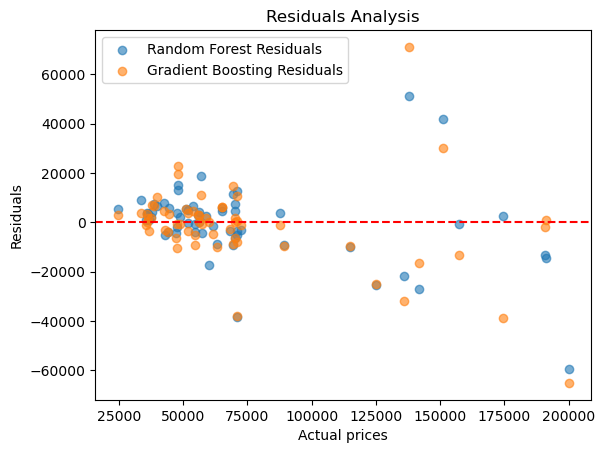

In [109]:
# new residual plot
plt.scatter(y_test, rf_predictions - y_test, label="Random Forest Residuals", alpha=0.6)
plt.scatter(y_test, gb_predictions - y_test, label="Gradient Boosting Residuals", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Analysis")
plt.xlabel("Actual prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### The scatterplot has practicaly not changed with the clipping, which means that the outliers were not having a huge impact on the results in the first place. It just means that the indipendent variables are very good at eplaining the variance of the price for cheap and mid-priced cars, while the same method is not as representative for very expensive vehicles.

# Robust scaling

### Another method of handling the outliers would be using robust scaling, which is an advanced data manipulation technique made to improve upon the standard scaling in case of anomalies.

In [132]:
from sklearn.preprocessing import RobustScaler
data_scaler = RobustScaler()
X_train_scaled = data_scaler.fit_transform(X_train)
X_test_scaled = data_scaler.transform(X_test)


In [134]:
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_

rf_predictions = rf_best.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Mean Squared Error: 625287581.0825546
R^2 Score: 0.6556835671227628


In [136]:
gb_grid.fit(X_train_scaled, y_train)
gb_best = gb_grid.best_estimator_

gb_predictions = gb_best.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Mean Squared Error: {gb_mse}")
print(f"R^2 Score: {gb_r2}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mean Squared Error: 1039404850.6992254
R^2 Score: 0.42764868304524295


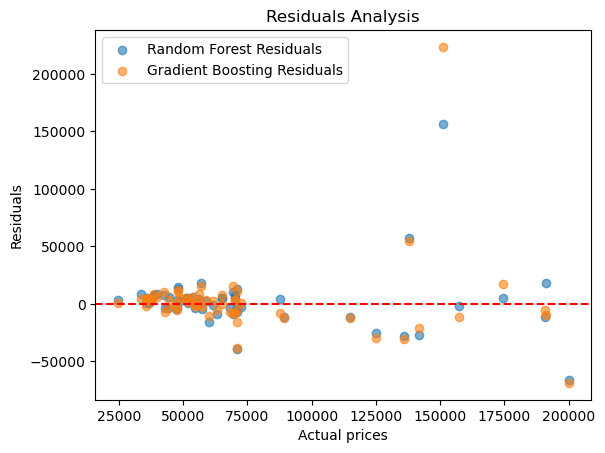

In [137]:
plt.scatter(y_test, rf_predictions - y_test, label="Random Forest Residuals", alpha=0.6)
plt.scatter(y_test, gb_predictions - y_test, label="Gradient Boosting Residuals", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Analysis")
plt.xlabel("Actual prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### Looking ata this residual chart, it can be seen that, the residuals are for the most part closer to 0 than before. There are still some extreme values, but thanks to robust scalling, the regression model proves to be somewhat relevant even for the expensive cars.

# What can be said about the cars? Do the components play a very relevant role in determining the pricing?

## To sum everything up, there is something that can be said about the price of a vehicle and it's specifications. The consensus seems to be that a more capable car, a faster one, a longer-lasting one, a more durable one will not be one of the cheapest. There is a reason why paying more will offer a better experience. However, there is a price point in the middle which seems to be the sweetspot, offering the consumer a good price to performance ratio and paying more for a high-end electric vehicle will not guarantee that it will be significantly better. So, going out and buying the most extravagant and advanced car is not the best investment for the consumer.